# Heston Nandi Options

In [9]:
%load_ext autoreload
%autoreload 2
import finoptions as fo
import numpy as np
import pandas as pd

In [2]:
lamb=-0.5; omega=2.3e-6; alpha=2.9e-6; beta=0.85; gamma=184.25; S=100; K=100; t=252; r=0.05/252

In [3]:
opt = fo.heston_nandi_options.HestonNandiOption(S=S, K=K, t=t, r=r, lamb=lamb,omega=omega,alpha=alpha,beta=beta,gamma=gamma)

In [4]:
opt.call()

8.9920997701416

In [5]:
opt.put()


4.115042220213013

In [6]:
opt.delta()

0.6739533898008037

In [7]:
opt.gamma()

0.022111494128823447

In [8]:
const = 1
phi = 20
for k in range(0,500):
    # Model Parameters:
    gamma = gamma + lamb + 1 / 2
    lamb = -1 / 2
    sigma2 = (omega + alpha) / (1 - beta - alpha * gamma ** 2)
    # Function to be integrated:
    cphi0 = phi * np.array([1j])
    cphi = cphi0 + const
    a = cphi * r
    b = lamb * cphi + cphi * cphi / 2
    # fmt: off
    for i in range(1, t):
        a = a + cphi*r + b*omega - np.log(1-2*alpha*b)/2
        b = cphi*(lamb+gamma) - gamma**2/2 + beta*b + 0.5*(cphi-gamma)**2/(1-2*alpha*b)

In [9]:
anp = np.array([0j]*t)
anp[0] = a[0]

In [10]:
bnp = np.array([0j]*t)
bnp[0] = b[0]

# Garch Functions and Sims

In [3]:
%load_ext autoreload
%autoreload 2
import finoptions as fo
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from scipy.optimize import minimize as _minimize

In [5]:
ts = pd.read_csv("../pytest/garch_ts.csv").x
ts = np.array(ts)

lamb = 4
omega = 8e-5
alpha = 6e-5
beta = 0.7
gamma = 0
rf = 0

rfr = rf

In [17]:
symmetric=True
trace=False

In [11]:
x=ts

In [48]:
rfr = rf
gam = gamma

# Continue:
params = dict(lamb = lamb, omega = omega, alpha = alpha,
    beta = beta, gamma = gam, rf = rfr)

# Transform Parameters and Calculate Start Parameters:
par_omega = -np.log((1-omega)/omega)  # for 2
par_alpha = -np.log((1-alpha)/alpha)  # for 3
par_beta = -np.log((1-beta)/beta)     # for 4
par_start = [lamb, par_omega, par_alpha, par_beta]
if ~symmetric:
    par_start.append(gam)

# Initial Log Likelihood:
opt = dict()
opt['value'] = fo.heston_nandi_options._llhHNGarch(x0 = par_start, trace = trace, symmetric = symmetric, rfr = rfr, x = x)
opt['estimate'] = par_start

if trace:
    print(lamb, omega, alpha, beta, gam)
    print(opt['value'])

# Estimate Parameters:
opt = _minimize(fo.heston_nandi_options._llhHNGarch, par_start, args=(trace, symmetric, rfr, x), method='L-BFGS-B')

In [49]:
opt

      fun: -1229.42127597696
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([4.54747354e-05, 1.13686828e-04, 2.04636291e-04, 2.72848412e-04,
       0.00000000e+00])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 198
      nit: 26
     njev: 33
   status: 0
  success: True
        x: array([  4.07839585, -11.75859418, -10.00424578,   2.01849921,
         3.92247231])

In [54]:
fo.heston_nandi_options.hngarch_fit(ts, lamb=lamb, omega=omega, alpha=alpha, beta=beta, trace=False, symmetric=True)['model']

{'lamb': 4.07839584879081,
 'omega': 7.821751865836914e-06,
 'alpha': 4.520553685577064e-05,
 'beta': 0.8827257350255484,
 'gamma': 0.0,
 'rf': 0}

# HN Garch Sim

In [31]:
x = fo.heston_nandi_options.hngarch_sim(lamb = 4, omega = 8e-5, alpha = 6e-5, beta = 0.7, gamma = 0, rf = 0)

In [32]:
import matplotlib.pyplot as plt

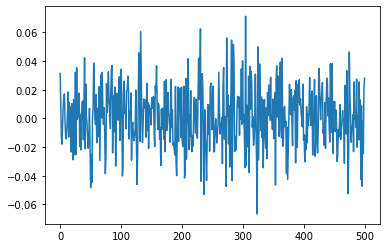

In [33]:
plt.plot(x)